# Generate Pareto frontier plots

TODO: We could consider doing some preprocessing on the dataframes, so that if the next result is worse, we just keep the preceding result. 

## Imports

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

## m=2, exp2

### Load in source data

In [2]:
parent_dir = Path("/home/joefarrington/CDT/bloodbank_marl/bloodbank_marl/multi_agent/pareto_frontier_plots/outputs/2024-03-11/21-55-40")

heuristic_df = pd.read_csv(parent_dir / "heuristic_df.csv")
service_level_limit_df = pd.read_csv(parent_dir / "service_level_limit_df.csv")
wastage_limit_df = pd.read_csv(parent_dir / "wastage_limit_df.csv")
vi_df = pd.read_csv("/home/joefarrington/CDT/bloodbank_marl/bloodbank_marl/utils/viso_jax/value_iteration/outputs/2024-03-11/18-32-58/vi_df.csv")

### Create figure

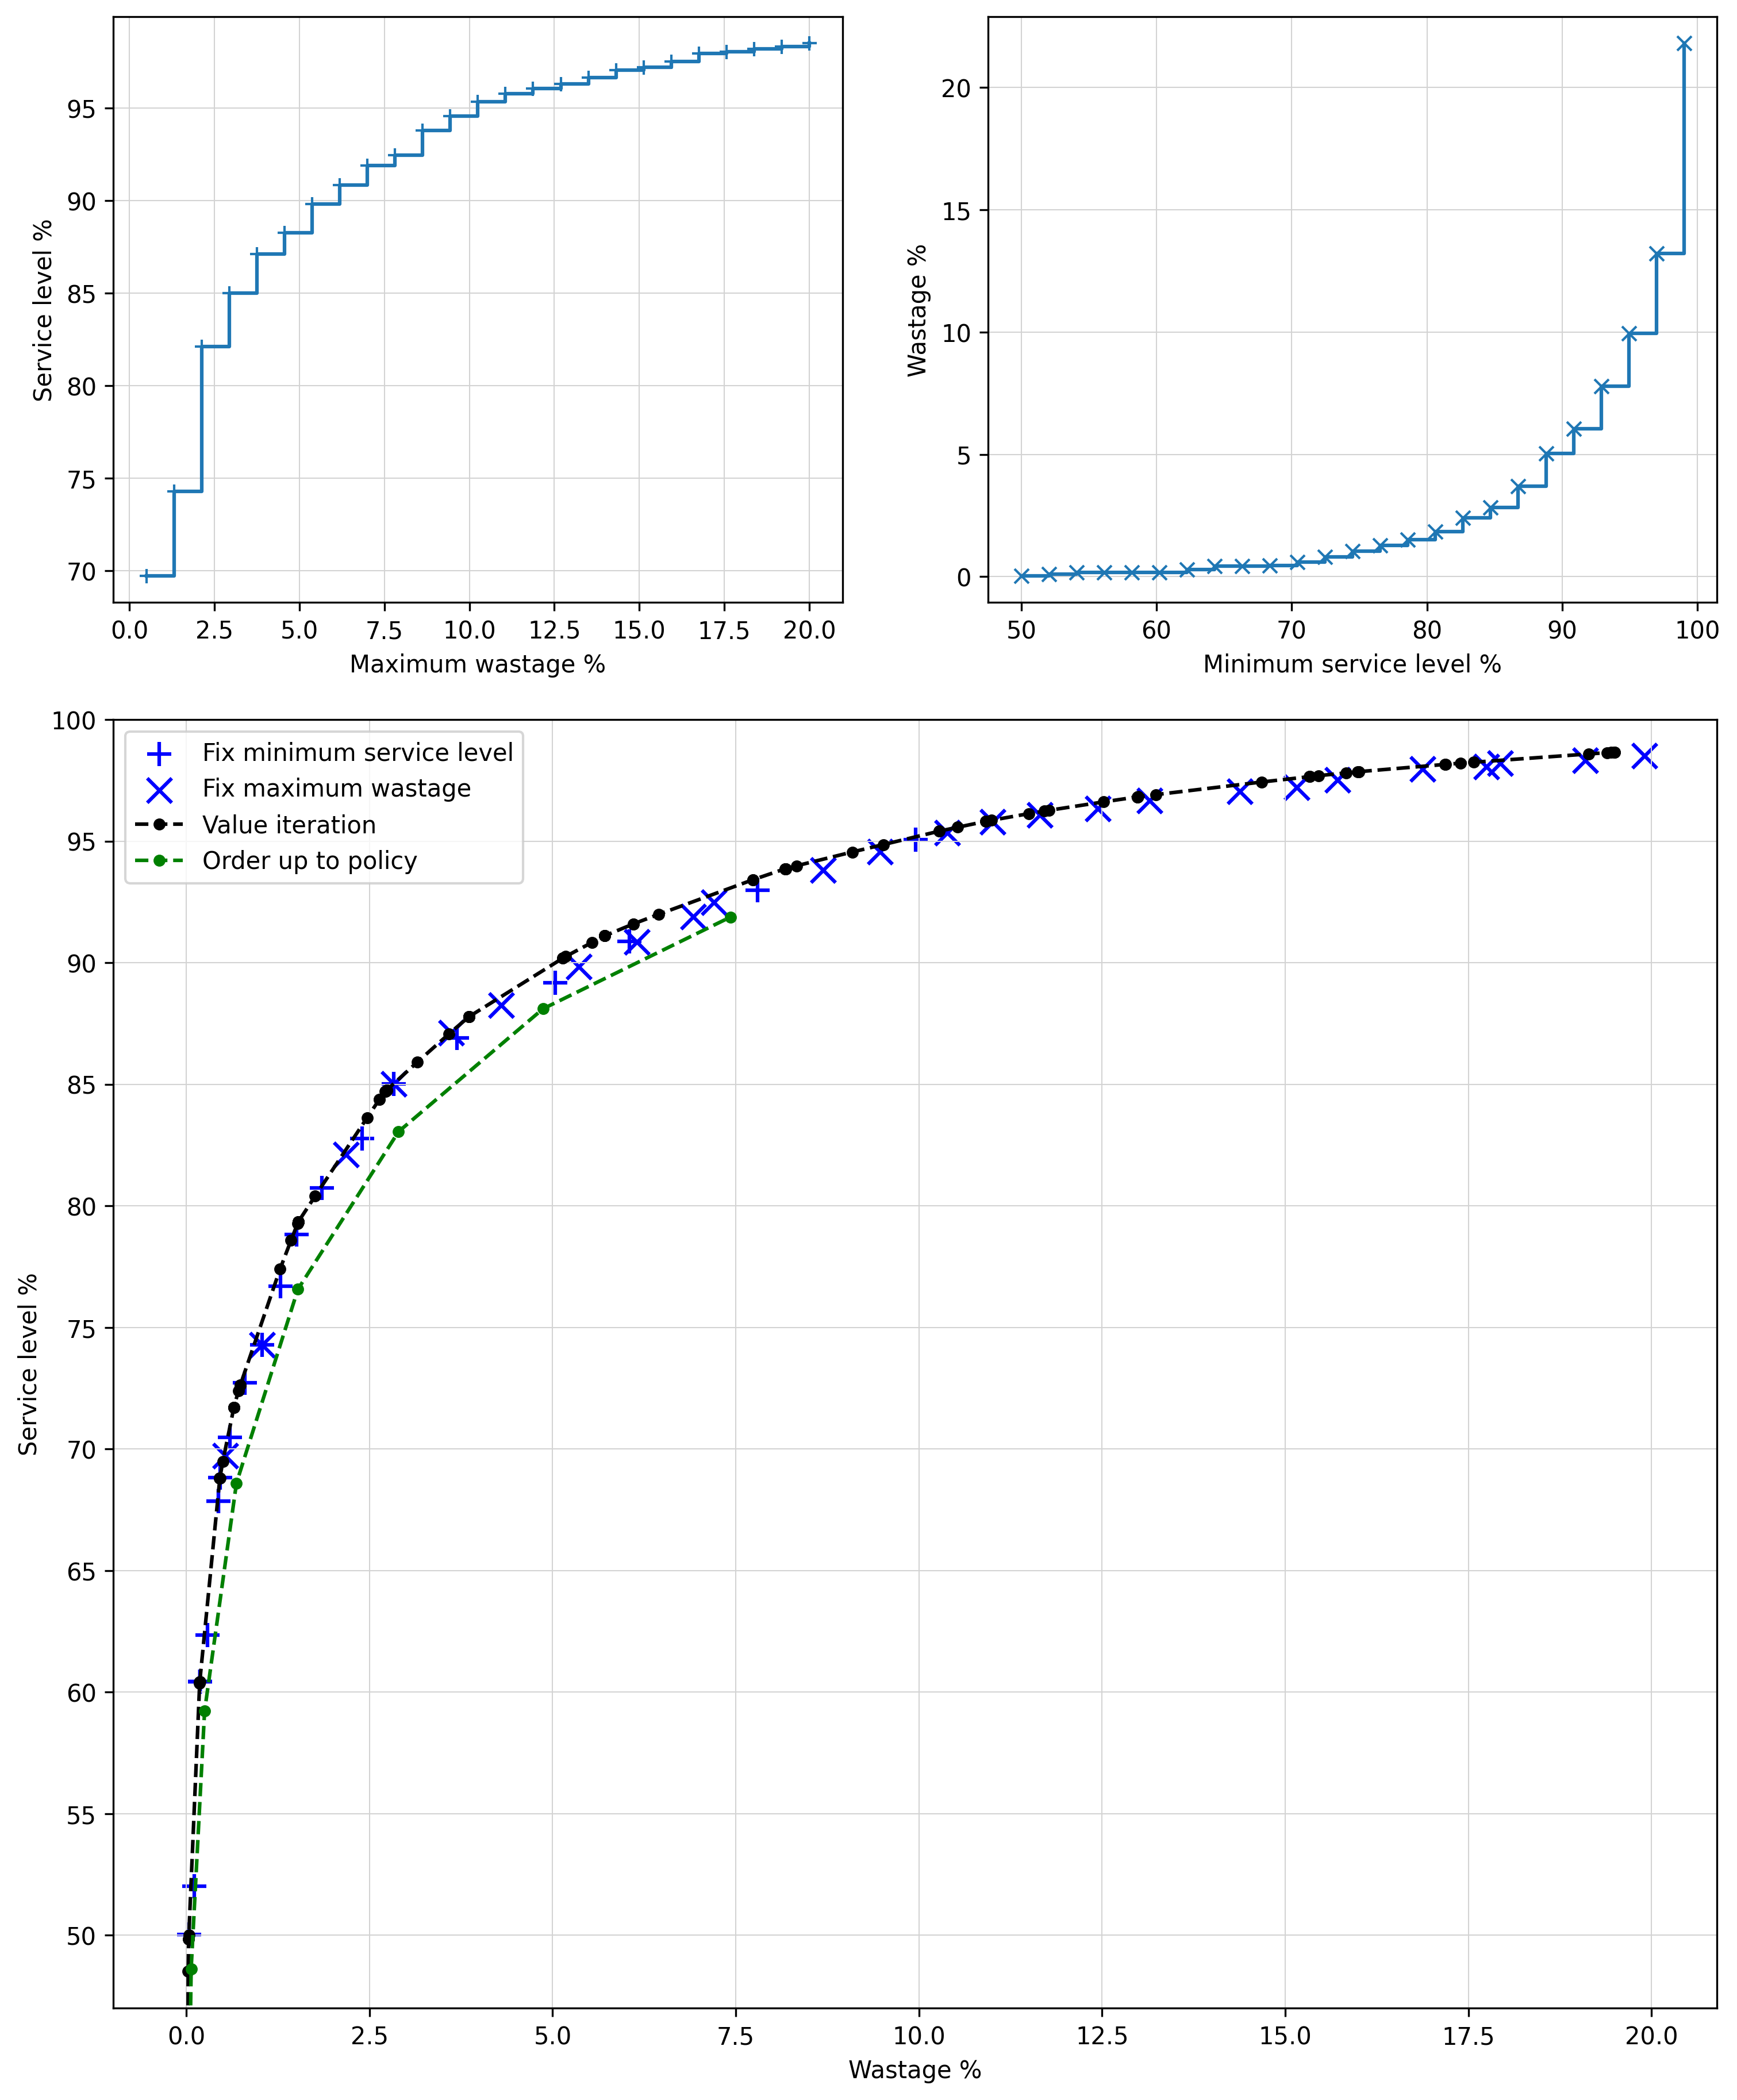

In [6]:
fig = plt.figure(figsize=(12, 15), dpi=300)
gs = GridSpec(3, 2, figure=fig)

# Exchange curve when fixing max wastage
ax1 = fig.add_subplot(gs[0,0])
ax1.step(wastage_limit_df["penalty_kpi_threshold"], wastage_limit_df["top_1_service_level_%_mean"], label="top_1", marker="+", where='post')
ax1.set_xlabel("Maximum wastage %")
ax1.set_ylabel("Service level %")
ax1.grid(True, which='major', linestyle='-', linewidth='0.5', color='lightgray')

# Exchange curve when fixing min service level
ax2 = fig.add_subplot(gs[0,1])
ax2.step(service_level_limit_df["penalty_kpi_threshold"], service_level_limit_df["top_1_wastage_%_mean"], label="top_1", marker="x", where='post')
ax2.set_xlabel("Minimum service level %")
ax2.set_ylabel("Wastage %")
ax2.grid(True, which='major', linestyle='-', linewidth='0.5', color='lightgray')

# Estimate Pareto frontier with NN, plotted against KPIs from heuristic policy
ax3 = fig.add_subplot(gs[1:,:])
ax3.scatter(service_level_limit_df["top_1_wastage_%_mean"], service_level_limit_df["top_1_service_level_%_mean"], label="Fix minimum service level", marker="+", s=105, color='blue')
ax3.scatter(wastage_limit_df["top_1_wastage_%_mean"], wastage_limit_df["top_1_service_level_%_mean"], label="Fix maximum wastage", marker="x", color='blue', s=105)
ax3.plot(vi_df["wastage_%_mean"], vi_df["service_level_%_mean"], label="Value iteration", marker='o', color='black', linestyle='--', markersize='4')
ax3.plot(heuristic_df["wastage_%_mean"], heuristic_df["service_level_%_mean"], label="Order up to policy", marker='o', linestyle='--', color='green', markersize='4')
ax3.set_ylabel("Service level %")
ax3.set_xlabel("Wastage %")
ax3.set_ylim(47,100)
ax3.set_yticks(np.arange(50, 105, 5))
ax3.grid(True, which='major', linestyle='-', linewidth='0.5', color='lightgray')
ax3.legend()

## m=2, exp6

In [24]:
#parent_dir = Path("/home/joefarrington/CDT/bloodbank_marl/bloodbank_marl/multi_agent/pareto_frontier_plots/outputs/2024-03-11/21-55-40")

#heuristic_df = pd.read_csv(parent_dir / "heuristic_df.csv")
#service_level_limit_df = pd.read_csv(parent_dir / "service_level_limit_df.csv")
#wastage_limit_df = pd.read_csv(parent_dir / "wastage_limit_df.csv")
vi_df = pd.read_csv("/home/joefarrington/CDT/bloodbank_marl/bloodbank_marl/utils/viso_jax/value_iteration/outputs/2024-03-13/07-19-26/vi_df.csv")

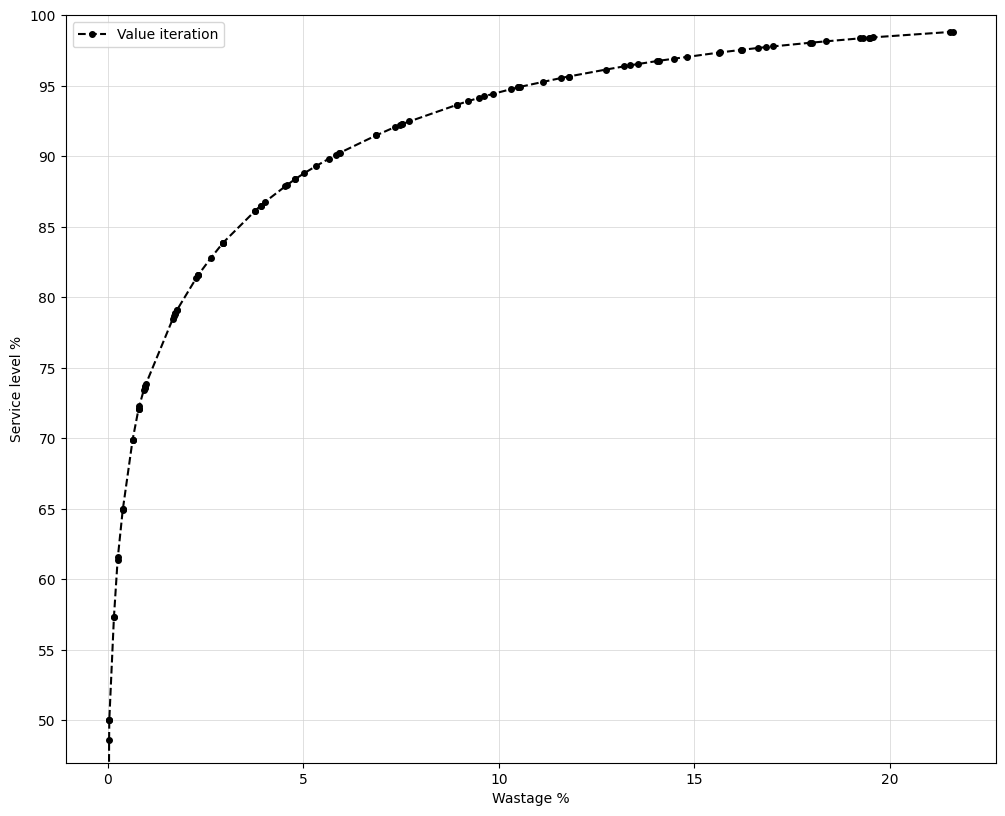

In [26]:
fig = plt.figure(figsize=(12, 15), dpi=100)
gs = GridSpec(3, 2, figure=fig)

"""
# Exchange curve when fixing max wastage
ax1 = fig.add_subplot(gs[0,0])
ax1.step(wastage_limit_df["penalty_kpi_threshold"], wastage_limit_df["top_1_service_level_%_mean"], label="top_1", marker="+", where='post')
ax1.set_xlabel("Maximum wastage %")
ax1.set_ylabel("Service level %")
ax1.grid(True, which='major', linestyle='-', linewidth='0.5', color='lightgray')

# Exchange curve when fixing min service level
ax2 = fig.add_subplot(gs[0,1])
ax2.step(service_level_limit_df["penalty_kpi_threshold"], service_level_limit_df["top_1_wastage_%_mean"], label="top_1", marker="x", where='post')
ax2.set_xlabel("Minimum service level %")
ax2.set_ylabel("Wastage %")
ax2.grid(True, which='major', linestyle='-', linewidth='0.5', color='lightgray')
"""

# Estimate Pareto frontier with NN, plotted against KPIs from heuristic policy
ax3 = fig.add_subplot(gs[1:,:])
#ax3.scatter(service_level_limit_df["top_1_wastage_%_mean"], service_level_limit_df["top_1_service_level_%_mean"], label="Fix minimum service level", marker="+", s=105, color='blue')
#ax3.scatter(wastage_limit_df["top_1_wastage_%_mean"], wastage_limit_df["top_1_service_level_%_mean"], label="Fix maximum wastage", marker="x", color='blue', s=105)
ax3.plot(vi_df["wastage_%_mean"], vi_df["service_level_%_mean"], label="Value iteration", marker='o', color='black', linestyle='--', markersize='4')
#ax3.plot(heuristic_df["wastage_%_mean"], heuristic_df["service_level_%_mean"], label="Order up to policy", marker='o', linestyle='--', color='green', markersize='4')
ax3.set_ylabel("Service level %")
ax3.set_xlabel("Wastage %")
ax3.set_ylim(47,100)
ax3.set_yticks(np.arange(50, 105, 5))
ax3.grid(True, which='major', linestyle='-', linewidth='0.5', color='lightgray')
ax3.legend()

## m5 exp2

In [31]:
#parent_dir = Path("/home/joefarrington/CDT/bloodbank_marl/bloodbank_marl/multi_agent/pareto_frontier_plots/outputs/2024-03-11/21-55-40")

#heuristic_df = pd.read_csv(parent_dir / "heuristic_df.csv")
#service_level_limit_df = pd.read_csv(parent_dir / "service_level_limit_df.csv")
#wastage_limit_df = pd.read_csv(parent_dir / "wastage_limit_df.csv")
vi_df = pd.read_csv("/home/joefarrington/CDT/bloodbank_marl/bloodbank_marl/utils/viso_jax/value_iteration/outputs/2024-03-13/08-03-51/vi_df.csv")

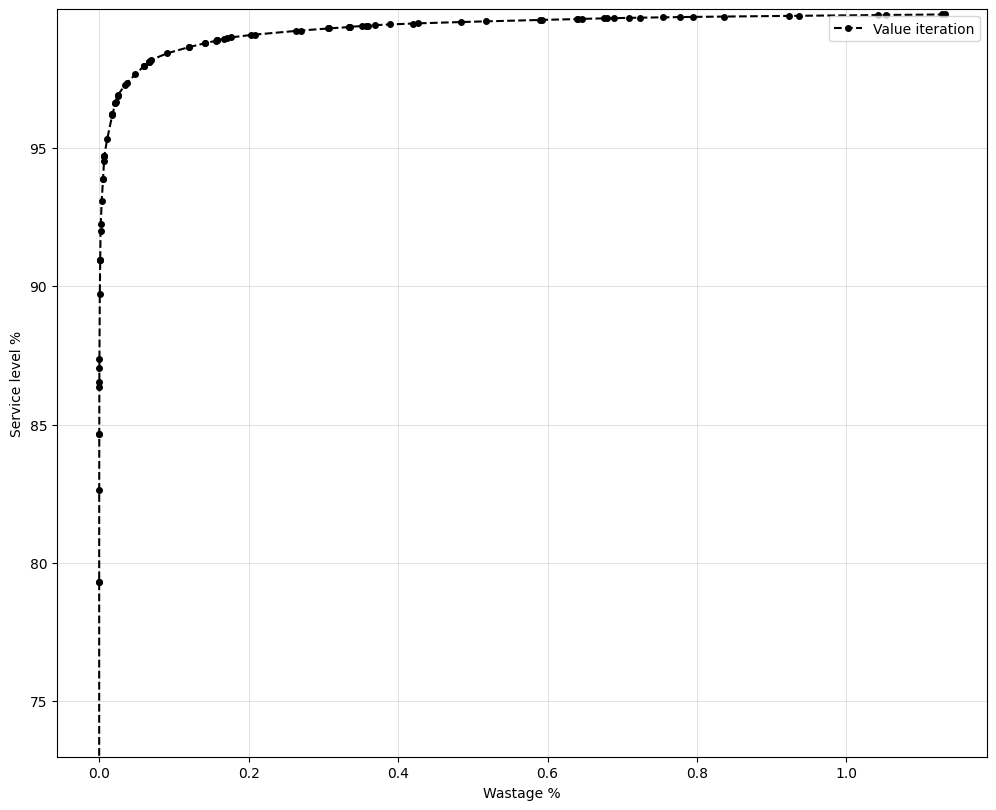

In [32]:
fig = plt.figure(figsize=(12, 15), dpi=100)
gs = GridSpec(3, 2, figure=fig)

"""
# Exchange curve when fixing max wastage
ax1 = fig.add_subplot(gs[0,0])
ax1.step(wastage_limit_df["penalty_kpi_threshold"], wastage_limit_df["top_1_service_level_%_mean"], label="top_1", marker="+", where='post')
ax1.set_xlabel("Maximum wastage %")
ax1.set_ylabel("Service level %")
ax1.grid(True, which='major', linestyle='-', linewidth='0.5', color='lightgray')

# Exchange curve when fixing min service level
ax2 = fig.add_subplot(gs[0,1])
ax2.step(service_level_limit_df["penalty_kpi_threshold"], service_level_limit_df["top_1_wastage_%_mean"], label="top_1", marker="x", where='post')
ax2.set_xlabel("Minimum service level %")
ax2.set_ylabel("Wastage %")
ax2.grid(True, which='major', linestyle='-', linewidth='0.5', color='lightgray')
"""

# Estimate Pareto frontier with NN, plotted against KPIs from heuristic policy
ax3 = fig.add_subplot(gs[1:,:])
#ax3.scatter(service_level_limit_df["top_1_wastage_%_mean"], service_level_limit_df["top_1_service_level_%_mean"], label="Fix minimum service level", marker="+", s=105, color='blue')
#ax3.scatter(wastage_limit_df["top_1_wastage_%_mean"], wastage_limit_df["top_1_service_level_%_mean"], label="Fix maximum wastage", marker="x", color='blue', s=105)
ax3.plot(vi_df["wastage_%_mean"], vi_df["service_level_%_mean"], label="Value iteration", marker='o', color='black', linestyle='--', markersize='4')
#ax3.plot(heuristic_df["wastage_%_mean"], heuristic_df["service_level_%_mean"], label="Order up to policy", marker='o', linestyle='--', color='green', markersize='4')
ax3.set_ylabel("Service level %")
ax3.set_xlabel("Wastage %")
ax3.set_ylim(73,100)
ax3.set_yticks(np.arange(75, 100, 5))
ax3.grid(True, which='major', linestyle='-', linewidth='0.5', color='lightgray')
ax3.legend()

## m5, exp6

In [28]:
#parent_dir = Path("/home/joefarrington/CDT/bloodbank_marl/bloodbank_marl/multi_agent/pareto_frontier_plots/outputs/2024-03-11/21-55-40")

#heuristic_df = pd.read_csv(parent_dir / "heuristic_df.csv")
#service_level_limit_df = pd.read_csv(parent_dir / "service_level_limit_df.csv")
#wastage_limit_df = pd.read_csv(parent_dir / "wastage_limit_df.csv")
vi_df_a = pd.read_csv("/home/joefarrington/CDT/bloodbank_marl/bloodbank_marl/utils/viso_jax/value_iteration/outputs/2024-03-13/22-35-19/vi_df.csv")
vi_df_b = pd.read_csv("/home/joefarrington/CDT/bloodbank_marl/bloodbank_marl/utils/viso_jax/value_iteration/outputs/2024-03-14/21-19-56/vi_df.csv")
vi_df = pd.concat([vi_df_a, vi_df_b])

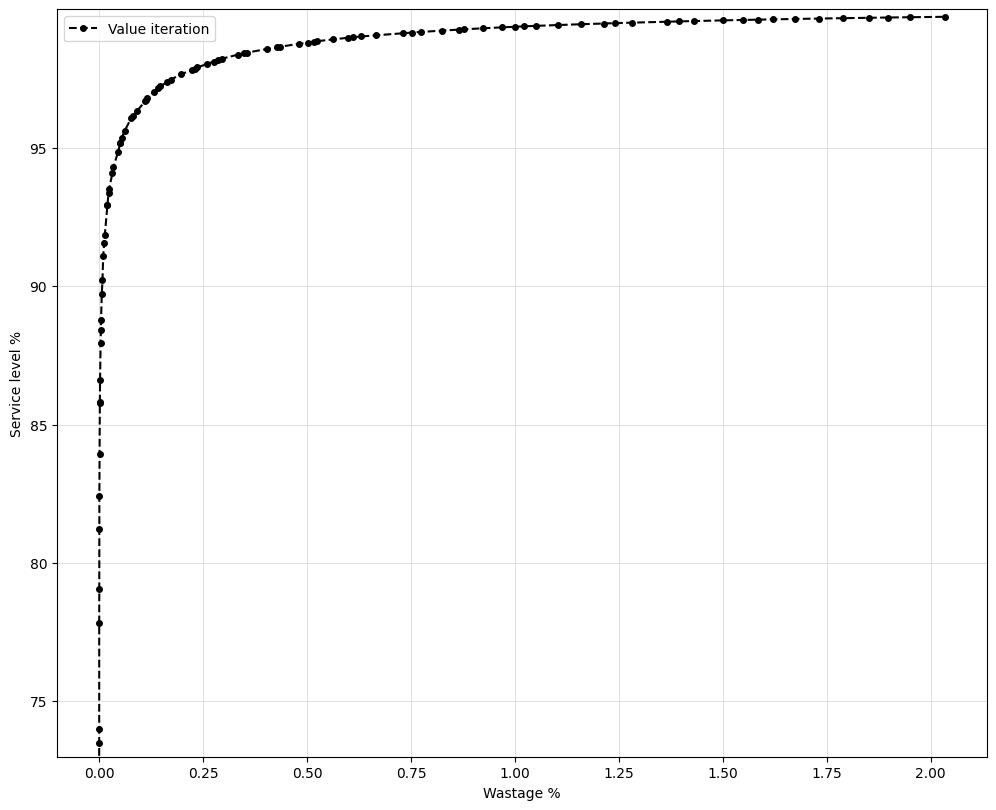

In [30]:
fig = plt.figure(figsize=(12, 15), dpi=100)
gs = GridSpec(3, 2, figure=fig)

"""
# Exchange curve when fixing max wastage
ax1 = fig.add_subplot(gs[0,0])
ax1.step(wastage_limit_df["penalty_kpi_threshold"], wastage_limit_df["top_1_service_level_%_mean"], label="top_1", marker="+", where='post')
ax1.set_xlabel("Maximum wastage %")
ax1.set_ylabel("Service level %")
ax1.grid(True, which='major', linestyle='-', linewidth='0.5', color='lightgray')

# Exchange curve when fixing min service level
ax2 = fig.add_subplot(gs[0,1])
ax2.step(service_level_limit_df["penalty_kpi_threshold"], service_level_limit_df["top_1_wastage_%_mean"], label="top_1", marker="x", where='post')
ax2.set_xlabel("Minimum service level %")
ax2.set_ylabel("Wastage %")
ax2.grid(True, which='major', linestyle='-', linewidth='0.5', color='lightgray')
"""

# Estimate Pareto frontier with NN, plotted against KPIs from heuristic policy
ax3 = fig.add_subplot(gs[1:,:])
#ax3.scatter(service_level_limit_df["top_1_wastage_%_mean"], service_level_limit_df["top_1_service_level_%_mean"], label="Fix minimum service level", marker="+", s=105, color='blue')
#ax3.scatter(wastage_limit_df["top_1_wastage_%_mean"], wastage_limit_df["top_1_service_level_%_mean"], label="Fix maximum wastage", marker="x", color='blue', s=105)
ax3.plot(vi_df["wastage_%_mean"], vi_df["service_level_%_mean"], label="Value iteration", marker='o', color='black', linestyle='--', markersize='4')
#ax3.plot(heuristic_df["wastage_%_mean"], heuristic_df["service_level_%_mean"], label="Order up to policy", marker='o', linestyle='--', color='green', markersize='4')
ax3.set_ylabel("Service level %")
ax3.set_xlabel("Wastage %")
ax3.set_ylim(73,100)
ax3.set_yticks(np.arange(75, 100, 5))
ax3.grid(True, which='major', linestyle='-', linewidth='0.5', color='lightgray')
ax3.legend()